### Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

### Data Dictionary:

Variable Name            | Description
-------------            | -------------
Vote                     | Party choice: Conservative or Labour
age                      | in years
economic.cond.national   | Assessment of current national economic conditions, 1 to 5.
economic.cond.household  | Assessment of current household economic conditions, 1 to 5.
Blair                    | Assessment of the Labour leader, 1 to 5.
Hague                    | Assessment of the Conservative leader, 1 to 5.
Europe                   | an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’                            sentiment.
political.knowledge      | Knowledge of parties' positions on European integration, 0 to 3.
Gender                   | female or male.


#### 1.1. Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

#### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

#### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

#### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis)

#### 1.5. Apply KNN Model and Naïve Bayes Model. Interpret the results. 

#### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

#### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. 

#### 1.8 Based on these predictions, what are the insights? (5 marks)

***1.1. Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.***

In [8]:
# Importing the required libraries

import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.datasets import make_classification

from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  

In [2]:
os.getcwd()

'/home/jovyan/demo'

In [3]:
pip install openpyxl

     |████████████████████████████████| 242 kB 4.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [234]:
df=pd.read_excel('/home/jovyan/demo/Election_Data.xlsx')

In [235]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [236]:
# checking the shape and datatype information

print(f'Shape of the datset is {df.shape}')
print("--------------")
print(df.info())

Shape of the datset is (1525, 10)
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB
None


In [237]:
# No null values seen in the dataset

In [238]:
df.select_dtypes(include='object').columns

Index(['vote', 'gender'], dtype='object')

In [239]:
# Checking the Duplicate values

df.duplicated().sum()

0

In [240]:
# Checking duplicates after removing the Serial number columns

df1=df.iloc[:,1:]

In [241]:
df1.head(3)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male


In [242]:
df1.duplicated().sum()

8

In [243]:
# 8 duplicate values found, dropping them

df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

In [244]:
# Checking the unique values of the Object data types

object_values = []
for col in df1.select_dtypes(include='object').columns:
    object_values.append((col, df1[col].nunique()))
object_values = sorted(object_values, key=lambda x: x[1],reverse = True)
print("Unique values in each column are as follows\n")
for col,nunique in object_values:
    print(f"{col}: {nunique}: {df1[col].unique()}")

Unique values in each column are as follows

vote: 2: ['Labour' 'Conservative']
gender: 2: ['female' 'male']


In [245]:
df1['vote'].value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

In [246]:
df1['gender'].value_counts(normalize=True)

female    0.53263
male      0.46737
Name: gender, dtype: float64

In [15]:
# Checking the statistical description of the dataset
df1.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [16]:
df1.describe(include='object')

,vote,gender
count,1517,1517
unique,2,2
top,Labour,female
freq,1057,808


In [17]:
# checking the skewness
# If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
df1.skew()


age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

In [18]:
# The average ratings given for economic condition is close to 3. Maximum vote is given for Labour party 
# with count of 1063 and maximum voters are female.
# As per skewness values, the dataset is fairly symmetrical

***1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.***

In [19]:
# Changing the columns with rating values to categorical


In [20]:
df1.iloc[:,2:8]=df1.iloc[:,2:8].astype('category')

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   object  
 1   age                      1517 non-null   int64   
 2   economic.cond.national   1517 non-null   category
 3   economic.cond.household  1517 non-null   category
 4   Blair                    1517 non-null   category
 5   Hague                    1517 non-null   category
 6   Europe                   1517 non-null   category
 7   political.knowledge      1517 non-null   category
 8   gender                   1517 non-null   object  
dtypes: category(6), int64(1), object(2)
memory usage: 57.7+ KB


#### Univariate analysis

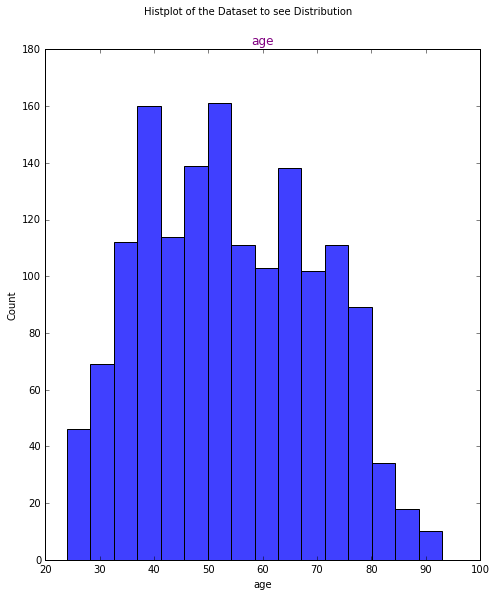

In [22]:
# Plotting Histplot to see if there are any outlier in any of the Columns

# sns.histplot(df1['age'])
fig=plt.figure(figsize=(7,8))
fig.suptitle('Histplot of the Dataset to see Distribution', y=1.03)
for i in range(0,df1.select_dtypes(include='int64').shape[1]):
    ax=fig.add_subplot(1,1,i+1)
    sns.histplot(df1[df1.select_dtypes(include='int64').columns[i]])
    ax.set_title(df1.select_dtypes(include='int64').columns[i], color='purple')
    
plt.tight_layout()
plt.show() 

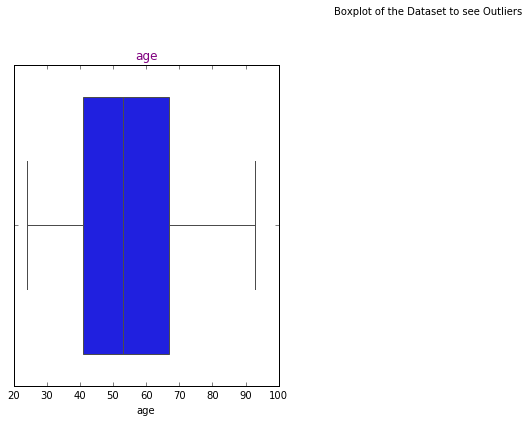

In [23]:
# Plotting Boxplot to see if there are any outlier in any of the Columns

fig=plt.figure(figsize=(12,15))
fig.suptitle('Boxplot of the Dataset to see Outliers', y=1.03)
for i in range(0,df1.select_dtypes(include='int64').shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(df1[df1.select_dtypes(include='int64').columns[i]])
    ax.set_title(df1.select_dtypes(include='int64').columns[i], color='purple')
    
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

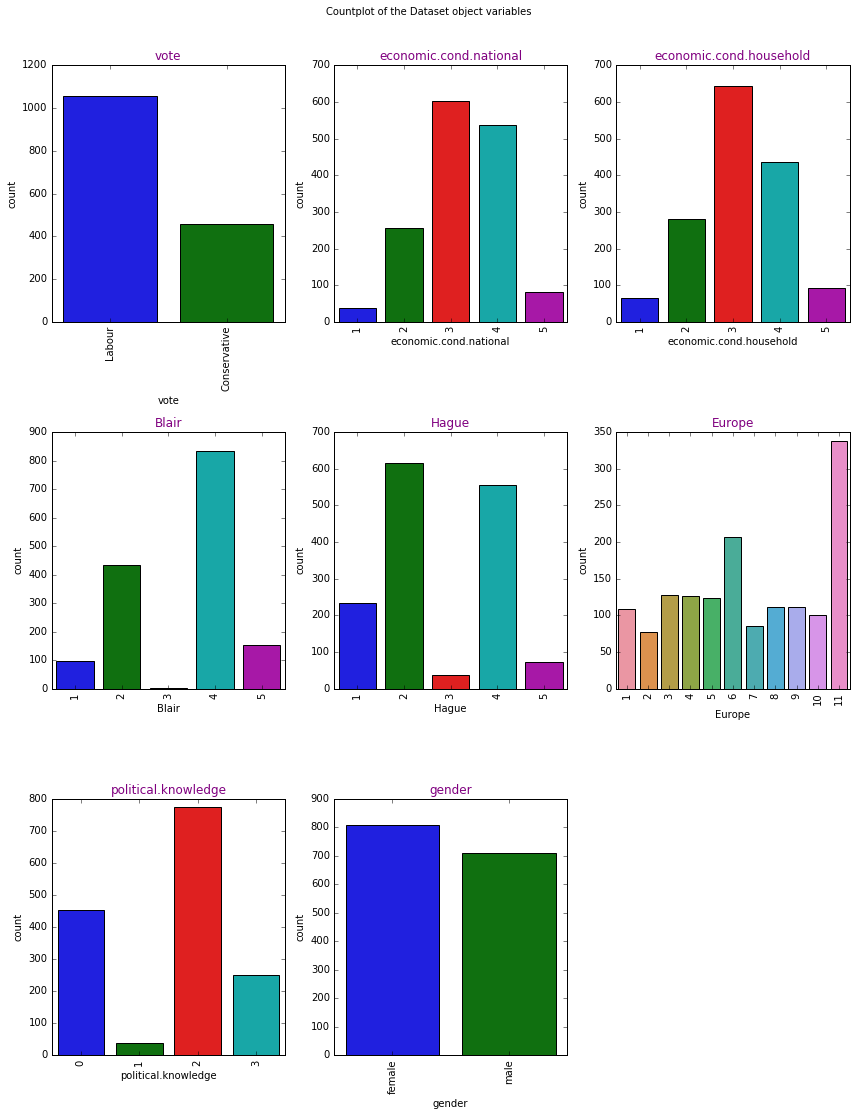

In [24]:

# Univariate analysis of the Categorical variable

fig=plt.figure(figsize=(12,15))
fig.suptitle('Countplot of the Dataset object variables', y=1.03)
for i in range(0,df1.select_dtypes(include=['object','category']).shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.countplot(df1[df1.select_dtypes(include=['object','category']).columns[i]])
    plt.xticks(rotation=90)
    ax.set_title(df1.select_dtypes(include=['object','category']).columns[i], color='purple')
    
plt.tight_layout()
plt.show


### Bivariate Analysis

In [25]:
# Using Bivariate Analysis between the variables
# Starting with Target Variable versus the indpendent variables with object or category datatype

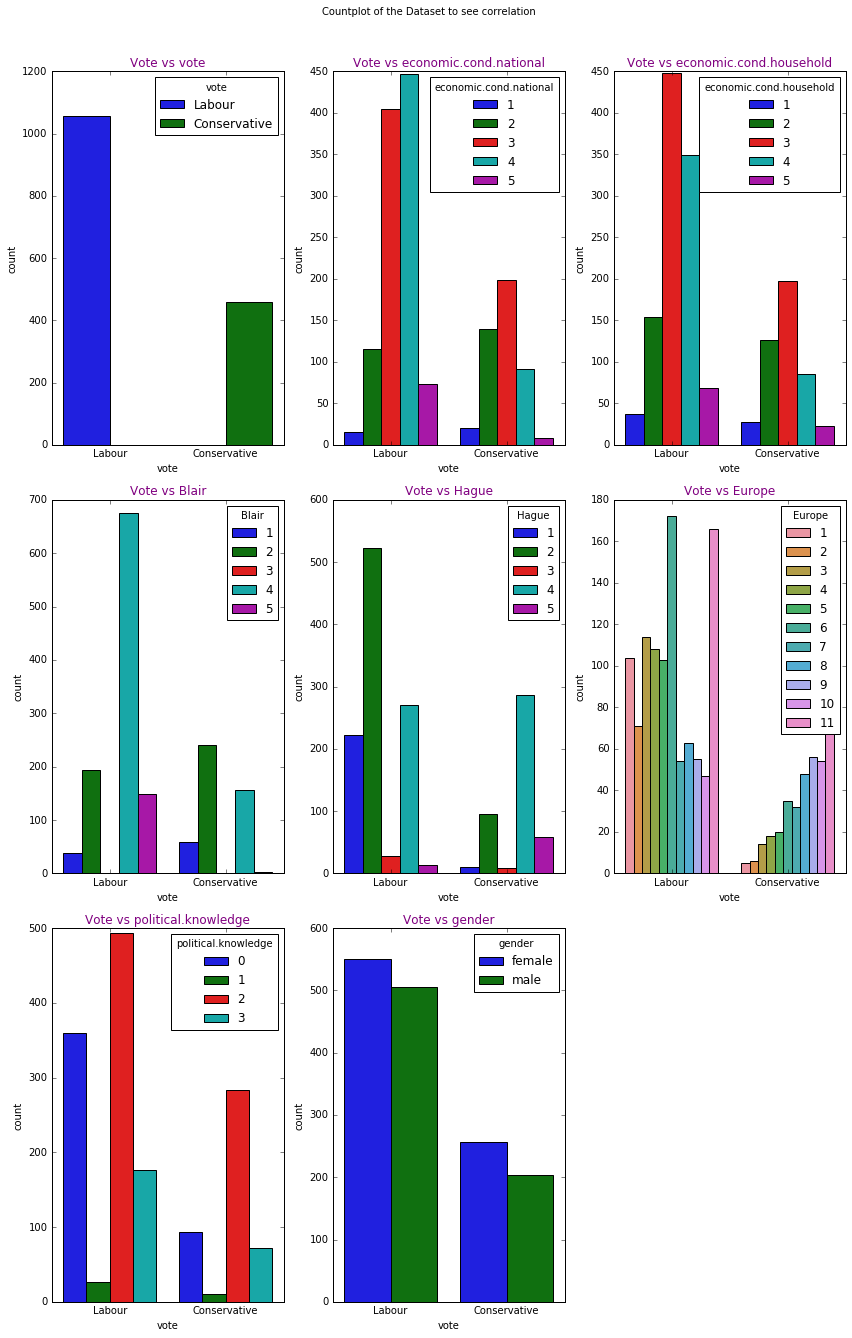

In [26]:

fig=plt.figure(figsize=(12,18))
fig.suptitle('Countplot of the Dataset to see correlation', y=1.03)
for i in range(0,df1.select_dtypes(include=['object','category']).shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.countplot(x=df1['vote'], hue=df1[df1.select_dtypes(include=['object','category']).columns[i]], data=df1)
    ax.set_title('Vote vs {}'.format(df1.select_dtypes(include=['object','category']).columns[i]), color='purple')
    
plt.tight_layout()
plt.show()

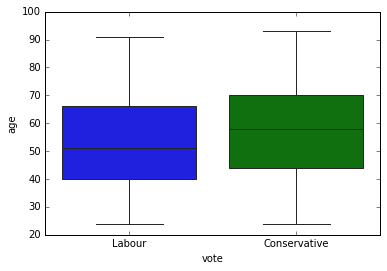

In [27]:
# Boxplot of numeric variables against the target variable

sns.boxplot(y = df1['age'], x=df1['vote'])


***1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).***

In [28]:
df1.head(3)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male


#### We can do label encoding for the 2 object type variables, vote and gender
Unique values in each column are as follows

#### vote: 2: ['Labour' 'Conservative']

#### gender: 2: ['female' 'male']

In [29]:
for j in df1.select_dtypes(['object']).columns:
    print('\n')
    print(f'Unique values of Variable {j} are {df1[j].unique()}')
    print(f'Categorical codes of encoded variable {j} are {pd.Categorical(df1[j].unique()).codes}')
    df1[j]=pd.Categorical(df1[j]).codes



Unique values of Variable vote are ['Labour' 'Conservative']
Categorical codes of encoded variable vote are [1 0]


Unique values of Variable gender are ['female' 'male']
Categorical codes of encoded variable gender are [0 1]


In [30]:
df1.head(3)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1


In [31]:
# The scaling is not seems necessary as most of the variables are categorical. However we can scale the 1 continuous variable, age
df1[['age']]=df1[['age']].apply(zscore)

In [32]:
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,-0.716161,3,3,4,1,2,2,0
1,1,-1.162118,4,4,4,4,5,2,1
2,1,-1.225827,4,4,5,2,3,2,1
3,1,-1.926617,4,2,2,1,4,0,0
4,1,-0.843577,2,2,1,1,6,2,1


In [33]:
#Splitting the dataset into Train and Test in the ration of 70% to 30% for modelling
x = df1.drop('vote', axis=1)
y = df1[['vote']]


In [34]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=1)

In [35]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((1061, 8), (456, 8), (1061, 1), (456, 1))

***1.4 Apply Logistic Regression and LDA (linear discriminant analysis)***

#### Applying Logistic Regression

In [36]:
# Applying GridSearch to find the best parameters
grid={'tol':[0.001,0.0001],
    'solver':['sag','lbfgs','newton-cg','liblinear'], 'C':[1.0,0.1,0.01],'penalty':['l2']  }

In [37]:
# Fit the Logistic Regression model
model_LR = LogisticRegression(max_iter=100,verbose=False,n_jobs=-1)

In [38]:
grid_search = GridSearchCV(estimator = model_LR, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [39]:
Class_LR=grid_search.fit(x_train, y_train)
warnings.filterwarnings('ignore')

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. I

In [40]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'C': 1.0, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=False,
                   warm_start=False)


In [41]:
best_model = grid_search.best_estimator_

In [42]:
# Predicting on Training and Test dataset

In [43]:
y_train_predict_lr = best_model.predict(x_train)
y_test_predict_lr = best_model.predict(x_test)

In [44]:
y_train_predict_lr

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [45]:
y_test_predict_lr

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,

#### Applying Linear Discriminant Analysis

In [46]:
# Applying GridSearch to find the best parameters
grid_lda={'solver':['svd','lsqr', 'eigen'],
      'tol':[0.001,0.0001]}

In [47]:
# Fit the LDA model in the new dataset

In [48]:
LDA = LinearDiscriminantAnalysis()
grid_search_LDA = GridSearchCV(estimator = LDA, param_grid = grid_lda, cv = 3,n_jobs=-1,scoring='f1')

In [49]:
Class_LDA=grid_search_LDA.fit(x_train, y_train)
warnings.filterwarnings('ignore')

In [50]:

print(grid_search_LDA.best_params_,'\n')
print(grid_search_LDA.best_estimator_)

{'solver': 'svd', 'tol': 0.001} 

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.001)


In [51]:

best_model_LDA = grid_search_LDA.best_estimator_

In [52]:

# Predicting on Training and Test dataset

y_train_predict_lda = best_model_LDA.predict(x_train)

y_test_predict_lda = best_model_LDA.predict(x_test)

In [53]:
y_train_predict_lda

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [54]:
y_test_predict_lda

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,

***1.5. Apply KNN Model and Naïve Bayes Model. Interpret the results.***

#### Applying Naive Bayes Model

In [70]:
# Applying KNN Model

from sklearn import metrics


In [71]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [72]:
# Predicting on Training and Test dataset
y_train_predict_NB = NB_model.predict(x_train)
y_test_predict_NB = NB_model.predict(x_test)

In [73]:
y_train_predict_NB

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [74]:
y_test_predict_NB

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,

In [75]:
# Checking the performance

model_score_NB = NB_model.score(x_test, y_test)                    ## Accuracy
print(model_score_NB)
print(metrics.confusion_matrix(y_test, y_test_predict_NB))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict_NB))    ## classification_report

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



#### Applying KNN Model

In [83]:
# Using grid search to check the best model parameters
from sklearn.neighbors import KNeighborsClassifier
grid_KNN={'n_neighbors':[5,9,15,19,25],
      'weights':['uniform','distance']}
KNN_model=KNeighborsClassifier()
grid_search_KNN = GridSearchCV(estimator = KNN_model, param_grid = grid_KNN, cv = 3,n_jobs=-1,scoring='f1')
Class_KNN=grid_search_KNN.fit(x_train, y_train)

In [84]:
print(grid_search_KNN.best_estimator_)
best_KNN_model = grid_search_KNN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')


In [85]:
# Predicting on Training and Test dataset

y_train_predict_KNN = best_KNN_model.predict(x_train)
y_test_predict_KNN = best_KNN_model.predict(x_test)

In [86]:
y_train_predict_KNN

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [87]:
y_test_predict_KNN

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,

In [92]:
# Checking the performance

model_score_KNN = best_KNN_model.score(x_test, y_test)
print(model_score_KNN)
print(metrics.confusion_matrix(y_test, y_test_predict_KNN))
print(metrics.classification_report(y_test, y_test_predict_KNN))

0.831140350877193
[[106  47]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



In [89]:
# Naive Bayes model showing better performance than KNN model

***1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.***

In [93]:
# Using Bagging Classifier with Random Forest as base estimator

# Using Grid search for Model tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(random_state=1)
grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [96]:
grid_search_rf.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 200}

In [97]:
best_grid_rf = grid_search_rf.best_estimator_

In [98]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=best_grid_rf, n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)
y_test_predict_bag = bgcl.predict(x_test)
y_train_predict_bag = bgcl.predict(x_train)

print(bgcl.score(x_test , y_test))
print(metrics.confusion_matrix(y_test, y_test_predict_bag))
print(metrics.classification_report(y_test, y_test_predict_bag))

0.8267543859649122
[[ 96  57]
 [ 22 281]]
              precision    recall  f1-score   support

           0       0.81      0.63      0.71       153
           1       0.83      0.93      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.79       456
weighted avg       0.83      0.83      0.82       456



In [99]:
# Applying Ada boosting method

from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(x_train, y_train)

In [100]:
y_test_predict_adab = abcl.predict(x_test)
y_train_predict_adab = abcl.predict(x_train)

print(abcl.score(x_test , y_test))
print(metrics.confusion_matrix(y_test, y_test_predict_adab))
print(metrics.classification_report(y_test, y_test_predict_adab))

0.8201754385964912
[[110  43]
 [ 39 264]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       153
           1       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [101]:
# Applying Gradient boosting method

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 10,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

In [103]:
y_test_predict_grab = gbcl.predict(x_test)
y_train_predict_grab = gbcl.predict(x_train)

print(abcl.score(x_test , y_test))
print(metrics.confusion_matrix(y_test, y_test_predict_grab))
print(metrics.classification_report(y_test, y_test_predict_grab))

0.8201754385964912
[[ 62  91]
 [  5 298]]
              precision    recall  f1-score   support

           0       0.93      0.41      0.56       153
           1       0.77      0.98      0.86       303

    accuracy                           0.79       456
   macro avg       0.85      0.69      0.71       456
weighted avg       0.82      0.79      0.76       456



***1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.***

In [104]:
# Accuracy Scores for Train and Test sets for all the 7 models, Logistic Regression, LDA, Naive Bayes, KNN, 
# Bagging, Ada Boosting and Gradient Boosting

In [105]:
Log_reg_Score_Train = best_model.score(x_train,y_train)
LogReg_Score_Test = best_model.score(x_test,y_test)

LDA_Score_Train = best_model_LDA.score(x_train,y_train)
LDA_Score_Test = best_model_LDA.score(x_test,y_test)

NB_Score_Train = NB_model.score(x_train,y_train)
NB_Score_Test = NB_model.score(x_test,y_test)

KNN_Score_Train = best_KNN_model.score(x_train,y_train)
KNN_Score_Test = best_KNN_model.score(x_test,y_test)

Bag_Score_Train = bgcl.score(x_train,y_train)
Bag_Score_Test = bgcl.score(x_test,y_test)

Ada_Score_Train = abcl.score(x_train,y_train)
Ada_Score_Test = abcl.score(x_test,y_test)

Grad_Score_Train = gbcl.score(x_train,y_train)
Grad_Score_Test = gbcl.score(x_test,y_test)

In [106]:
Accuracy_Scores = pd.DataFrame(data = [[Log_reg_Score_Train, LogReg_Score_Test],[LDA_Score_Train, LDA_Score_Test], [NB_Score_Train, NB_Score_Test], [KNN_Score_Train, KNN_Score_Test], [Bag_Score_Train, Bag_Score_Test], [Ada_Score_Train, Ada_Score_Test], [Grad_Score_Train, Grad_Score_Test]], columns = ['Train_Score','Test_Score'], index = ['Log_Regression','LDA','NB','KNN','Bagging','Ada-Boost','Grad-Boost']) 

In [107]:

Accuracy_Scores 

,Train_Score,Test_Score
Log_Regression,0.831291,0.835526
LDA,0.834119,0.833333
NB,0.835061,0.822368
KNN,0.847314,0.831140
Bagging,0.845429,0.826754
Ada-Boost,0.842601,0.820175
Grad-Boost,0.812441,0.789474


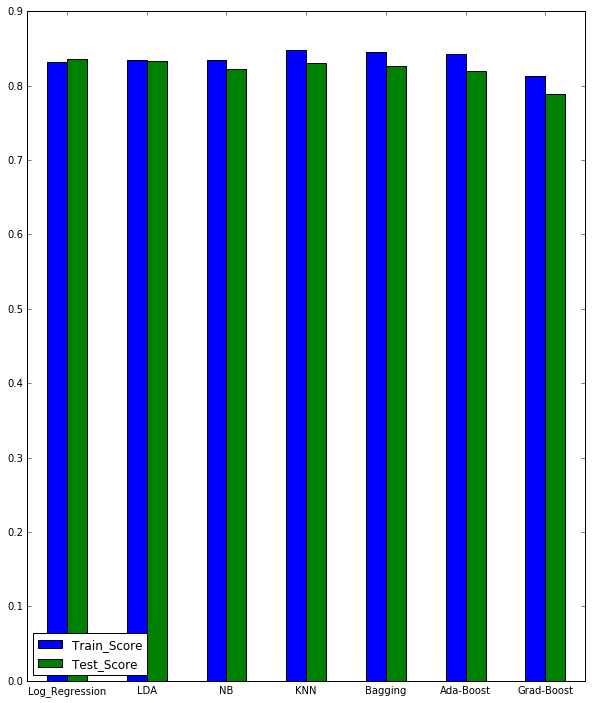

In [108]:
Accuracy_Scores.plot(kind = 'bar', figsize=(10,12))
plt.xticks(rotation=0)
plt.legend(loc='lower left')

In [109]:
# Plotting the Confusion matrix on the TRAIN dataset for Logistic Regression model

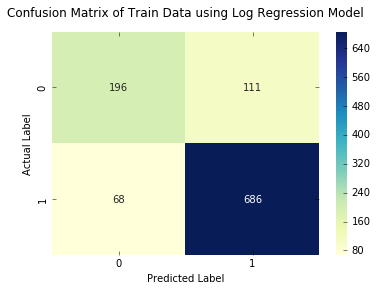

In [110]:
confusion_matrix(y_train, y_train_predict_lr)
sns.heatmap(confusion_matrix(y_train, y_train_predict_lr),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using Log Regression Model', pad =15)
plt.show()

In [111]:
# Plotting the Confusion matrix on the TEST dataset for Logistic Regression model

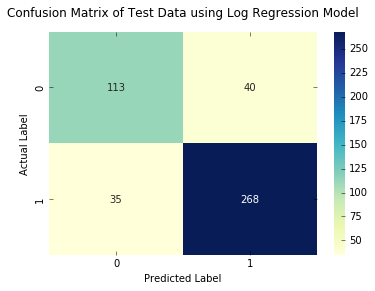

In [112]:
confusion_matrix(y_test, y_test_predict_lr)
sns.heatmap(confusion_matrix(y_test, y_test_predict_lr),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using Log Regression Model', pad =15)
plt.show()

In [113]:
# Plotting the Confusion matrix on the TRAIN dataset for LDA model

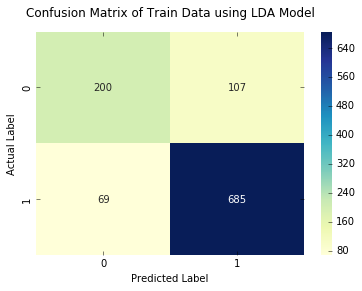

In [114]:
confusion_matrix(y_train, y_train_predict_lda)
sns.heatmap(confusion_matrix(y_train, y_train_predict_lda),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using LDA Model', pad =15)
plt.show()

In [115]:
# Plotting the Confusion matrix on the TEST dataset for LDA model

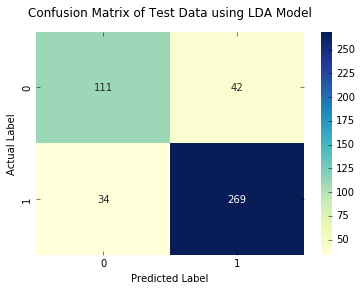

In [116]:
confusion_matrix(y_test, y_test_predict_lda)
sns.heatmap(confusion_matrix(y_test, y_test_predict_lda),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using LDA Model', pad =15)
plt.show()

In [117]:
# Plotting the Confusion matrix on the TRAIN dataset for NB model

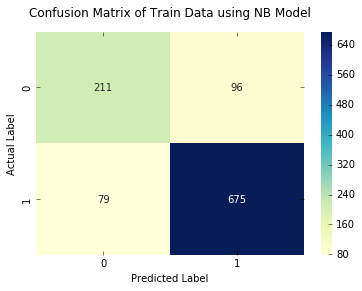

In [118]:
confusion_matrix(y_train, y_train_predict_NB)
sns.heatmap(confusion_matrix(y_train, y_train_predict_NB),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using NB Model', pad =15)
plt.show()

In [119]:
# Plotting the Confusion matrix on the TEST dataset for NB model

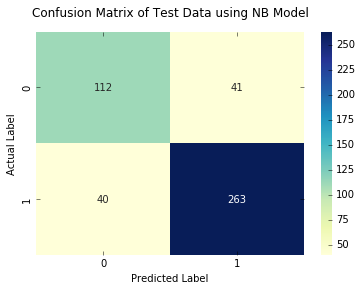

In [120]:
confusion_matrix(y_test, y_test_predict_NB)
sns.heatmap(confusion_matrix(y_test, y_test_predict_NB),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using NB Model', pad =15)
plt.show()

In [121]:
# Plotting the Confusion matrix on the TRAIN dataset for KNN model

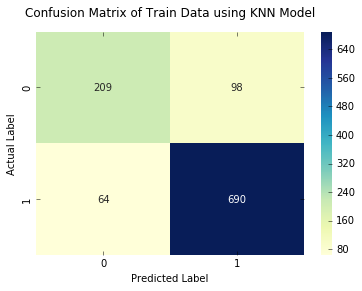

In [122]:
confusion_matrix(y_train, y_train_predict_KNN)
sns.heatmap(confusion_matrix(y_train, y_train_predict_KNN),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using KNN Model', pad =15)
plt.show()

In [123]:
# Plotting the Confusion matrix on the TEST dataset for KNN model

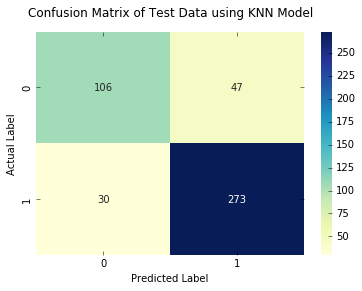

In [124]:
confusion_matrix(y_test, y_test_predict_KNN)
sns.heatmap(confusion_matrix(y_test, y_test_predict_KNN),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using KNN Model', pad =15)
plt.show()

In [125]:
# Plotting the Confusion matrix on the TRAIN dataset for Bagging model

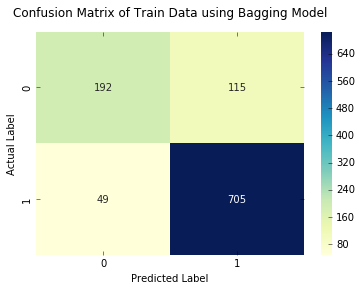

In [126]:
confusion_matrix(y_train, y_train_predict_bag)
sns.heatmap(confusion_matrix(y_train, y_train_predict_bag),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using Bagging Model', pad =15)
plt.show()

In [127]:
# Plotting the Confusion matrix on the TEST dataset for Bagging model

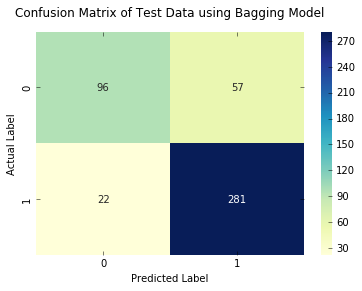

In [128]:
confusion_matrix(y_test, y_test_predict_bag)
sns.heatmap(confusion_matrix(y_test, y_test_predict_bag),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using Bagging Model', pad =15)
plt.show()

In [129]:
# Plotting the Confusion matrix on the TRAIN dataset for Ada boosting model

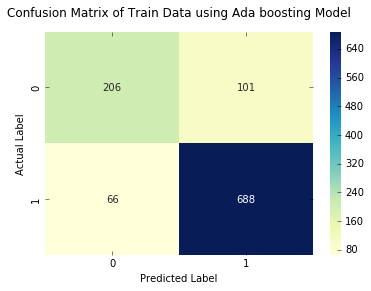

In [130]:
confusion_matrix(y_train, y_train_predict_adab)
sns.heatmap(confusion_matrix(y_train, y_train_predict_adab),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using Ada boosting Model', pad =15)
plt.show()

In [131]:
# Plotting the Confusion matrix on the TEST dataset for Ada boosting model

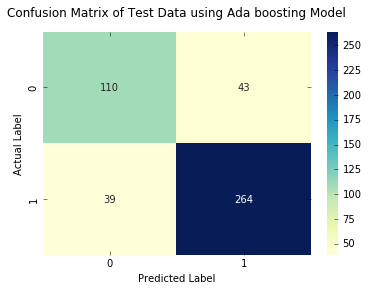

In [132]:
confusion_matrix(y_test, y_test_predict_adab)
sns.heatmap(confusion_matrix(y_test, y_test_predict_adab),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using Ada boosting Model', pad =15)
plt.show()

In [133]:
# Plotting the Confusion matrix on the TRAIN dataset for Gradient Boosting model

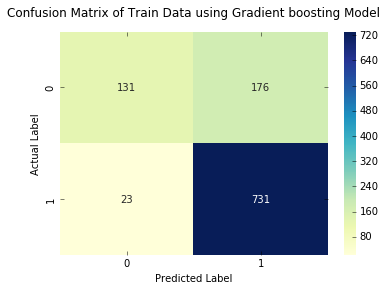

In [134]:
confusion_matrix(y_train, y_train_predict_grab)
sns.heatmap(confusion_matrix(y_train, y_train_predict_grab),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using Gradient boosting Model', pad =15)
plt.show()

In [135]:
# Plotting the Confusion matrix on the TEST dataset for Gradient Boosting model

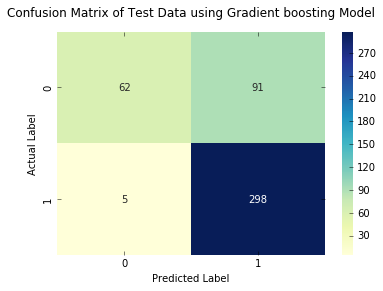

In [136]:
confusion_matrix(y_test, y_test_predict_grab)
sns.heatmap(confusion_matrix(y_test, y_test_predict_grab),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using Gradient boosting Model', pad =15)
plt.show()

In [137]:
# Classification Report of TRAIN and TEST data for Log Regression model

In [138]:
print(classification_report(y_train, y_train_predict_lr))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [139]:
print(classification_report(y_test, y_test_predict_lr))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



In [140]:
# Classification Report of TRAIN and TEST data for LDA model

In [141]:
print(classification_report(y_train, y_train_predict_lda))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [142]:
print(classification_report(y_test, y_test_predict_lda))

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [143]:
# Classification Report of TRAIN and TEST data for NB model

In [144]:
print(classification_report(y_train, y_train_predict_NB))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [145]:
print(classification_report(y_test, y_test_predict_NB))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [146]:
# Classification Report of TRAIN and TEST data for KNN model

In [147]:
print(classification_report(y_train, y_train_predict_KNN))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       307
           1       0.88      0.92      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [148]:
print(classification_report(y_test, y_test_predict_KNN))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



In [149]:
# Classification Report of TRAIN and TEST data for Bagging model

In [150]:
print(classification_report(y_train, y_train_predict_bag))

              precision    recall  f1-score   support

           0       0.80      0.63      0.70       307
           1       0.86      0.94      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.78      0.80      1061
weighted avg       0.84      0.85      0.84      1061



In [151]:
print(classification_report(y_test, y_test_predict_bag))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71       153
           1       0.83      0.93      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.79       456
weighted avg       0.83      0.83      0.82       456



In [152]:
# Classification Report of TRAIN and TEST data for Ada boosting model

In [153]:
print(classification_report(y_train, y_train_predict_adab))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [154]:
print(classification_report(y_test, y_test_predict_adab))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       153
           1       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [155]:
# Classification Report of TRAIN and TEST data for Gradient boosting model

In [156]:
print(classification_report(y_train, y_train_predict_grab))

              precision    recall  f1-score   support

           0       0.85      0.43      0.57       307
           1       0.81      0.97      0.88       754

    accuracy                           0.81      1061
   macro avg       0.83      0.70      0.72      1061
weighted avg       0.82      0.81      0.79      1061



In [157]:
print(classification_report(y_test, y_test_predict_grab))

              precision    recall  f1-score   support

           0       0.93      0.41      0.56       153
           1       0.77      0.98      0.86       303

    accuracy                           0.79       456
   macro avg       0.85      0.69      0.71       456
weighted avg       0.82      0.79      0.76       456



In [158]:
# AUC-ROC curve of Train data - log Regression

AUC: 0.890


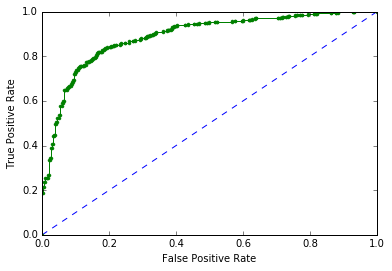

In [159]:
# predict probabilities
probs = best_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_lr = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_lr)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [160]:
# AUC-ROC curve of Test data - log Regression

AUC: 0.883


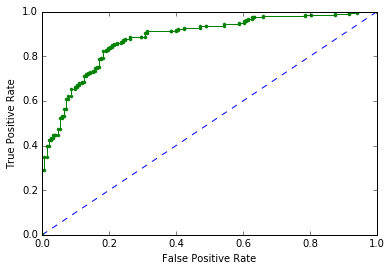

In [161]:
probs = best_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_lr = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_lr)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [162]:
# AUC-ROC curve of Train and Test data - LDA

AUC: 0.889


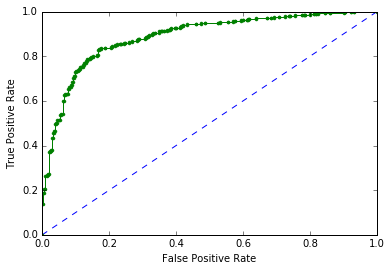

In [163]:
probs = best_model_LDA.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_lda = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_lda)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.888


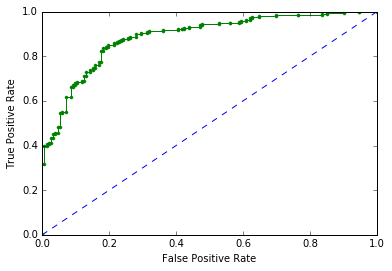

In [164]:
probs = best_model_LDA.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_lda = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_lda)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [165]:
# AUC-ROC curve of Train and Test data - NB

AUC: 0.888


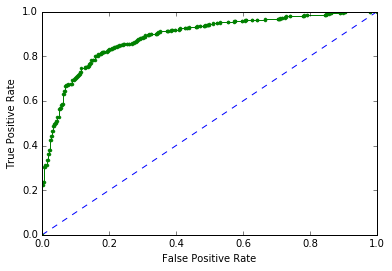

In [166]:
probs = NB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_nb = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_nb)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.876


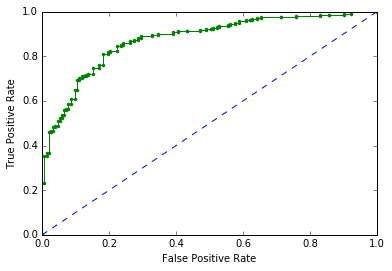

In [167]:
probs = NB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_nb = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_nb)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [168]:
# AUC-ROC curve of Train and Test data - KNN

AUC: 0.910


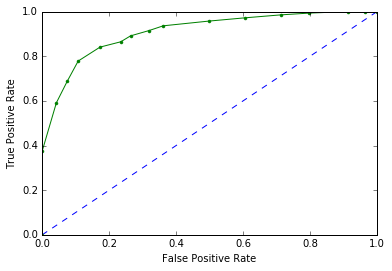

In [169]:
probs = best_KNN_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_knn = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_knn)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.893


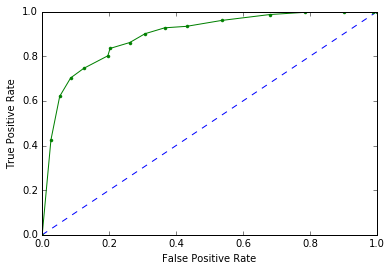

In [170]:
probs = best_KNN_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_knn = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_knn)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [171]:
# AUC-ROC curve of Train and Test data - Bagging

AUC: 0.907


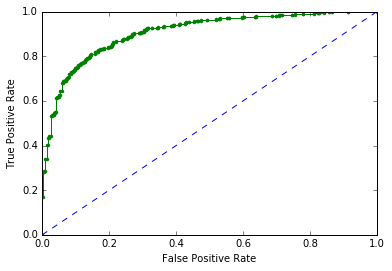

In [172]:
probs = bgcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_bag = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_bag)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.890


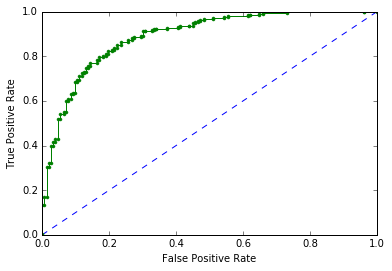

In [173]:
probs = bgcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_bag = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_bag)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [174]:
# AUC-ROC curve of Train and Test data - Ada boosting

AUC: 0.898


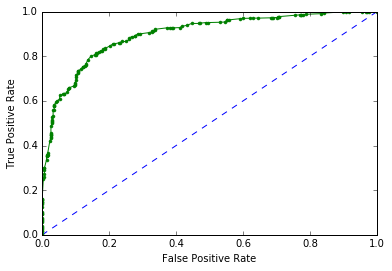

In [175]:
probs = abcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_adab = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_adab)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.878


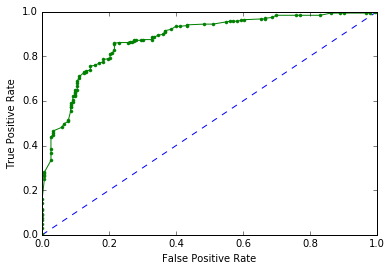

In [176]:
probs = abcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_adab = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_adab)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [177]:
# AUC-ROC curve of Train and Test data - Gradient boosting

AUC: 0.903


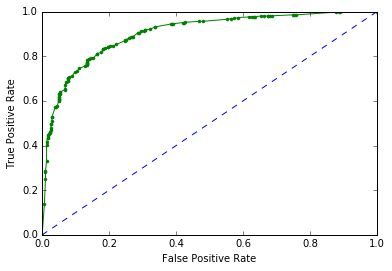

In [178]:
probs = gbcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_grab = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_grab)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.893


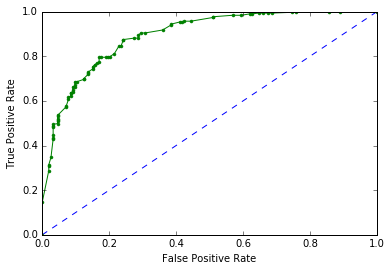

In [179]:
probs = gbcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_grab = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_grab)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [180]:
# Extracting the Accuracy, precision, Recall, F1 Score, AUC-ROC Score for Test and Train Data

In [181]:
from sklearn.metrics import precision_recall_fscore_support as score

In [182]:
# Extracting for Train Data

precision_Train_LogReg,recall_Train_LogReg,fscore_Train_LogReg,support_Train_LogReg =score(y_train, y_train_predict_lr,average='macro')

precision_Train_LDA,recall_Train_LDA,fscore_Train_LDA,support_Train_LDA =score(y_train, y_train_predict_lda,average='macro')

precision_Train_NB,recall_Train_NB,fscore_Train_NB,support_Train_NB =score(y_train, y_train_predict_NB,average='macro')

precision_Train_KNN,recall_Train_KNN,fscore_Train_KNN,support_Train_KNN =score(y_train, y_train_predict_KNN,average='macro')

precision_Train_bag,recall_Train_bag,fscore_Train_bag,support_Train_bag =score(y_train, y_train_predict_bag,average='macro')

precision_Train_adab,recall_Train_adab,fscore_Train_adab,support_Train_adab =score(y_train, y_train_predict_adab,average='macro')

precision_Train_grab,recall_Train_grab,fscore_Train_grab,support_Train_grab =score(y_train, y_train_predict_grab, average='macro')

In [183]:
# Creating DataFrame of Classification Report using 7 models for the Train datset
index = ['Log_Regression','LDA','NB','KNN','Bagging','Ada-Boost','Grad-Boost']
column = ['Precision_Train','Recall_Train','fscore_Train','Accuracy_Train', 'AUC-ROC_Score_Train']
Class_Report_Train = pd.DataFrame(data = [[precision_Train_LogReg,recall_Train_LogReg,fscore_Train_LogReg,Log_reg_Score_Train,auc_train_lr],
                                                      [precision_Train_LDA,recall_Train_LDA,fscore_Train_LDA,LDA_Score_Train,auc_train_lda],
                                         [precision_Train_NB,recall_Train_NB,fscore_Train_NB,NB_Score_Train,auc_train_nb],
                                         [precision_Train_KNN,recall_Train_KNN,fscore_Train_KNN,KNN_Score_Train,auc_train_knn],
                                         [precision_Train_bag,recall_Train_bag,fscore_Train_bag, Bag_Score_Train,auc_train_bag],
                                         [precision_Train_adab,recall_Train_adab,fscore_Train_adab,Ada_Score_Train,auc_train_adab],
                                         [precision_Train_grab,recall_Train_grab,fscore_Train_grab,Grad_Score_Train,auc_train_grab]]
                                                      , columns = column, index= index)

In [184]:
round(Class_Report_Train,2)

,Precision_Train,Recall_Train,fscore_Train,Accuracy_Train,AUC-ROC_Score_Train
Log_Regression,0.80,0.77,0.79,0.83,0.89
LDA,0.80,0.78,0.79,0.83,0.89
NB,0.80,0.79,0.80,0.84,0.89
KNN,0.82,0.80,0.81,0.85,0.91
Bagging,0.83,0.78,0.80,0.85,0.91
Ada-Boost,0.81,0.79,0.80,0.84,0.90
Grad-Boost,0.83,0.70,0.72,0.81,0.90


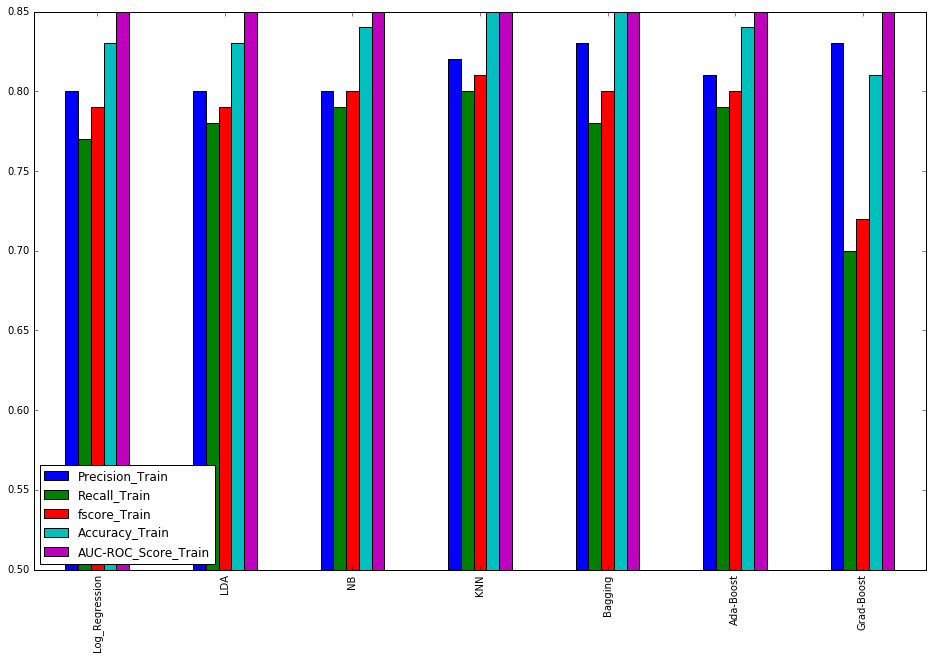

In [185]:
round(Class_Report_Train,2).plot(kind='bar',figsize=(16,10))
plt.ylim([0.5,0.85])
plt.legend( loc='lower left')

In [186]:
# Extracting for Test Data

In [187]:
precision_Test_LogReg,recall_Test_LogReg,fscore_Test_LogReg,support_Test_LogReg =score(y_test, y_test_predict_lr,average='macro')

precision_Test_LDA,recall_Test_LDA,fscore_Test_LDA,support_Test_LDA =score(y_test, y_test_predict_lda,average='macro')

precision_Test_NB,recall_Test_NB,fscore_Test_NB,support_Test_NB =score(y_test, y_test_predict_NB,average='macro')

precision_Test_KNN,recall_Test_KNN,fscore_Test_KNN,support_Test_KNN =score(y_test, y_test_predict_KNN,average='macro')

precision_Test_bag,recall_Test_bag,fscore_Test_bag,support_Test_bag =score(y_test, y_test_predict_bag,average='macro')

precision_Test_adab,recall_Test_adab,fscore_Test_adab,support_Test_adab =score(y_test, y_test_predict_adab,average='macro')

precision_Test_grab,recall_Test_grab,fscore_Test_grab,support_Test_grab =score(y_test, y_test_predict_grab, average='macro')

In [188]:
# Creating DataFrame of Classification Report using 7 models for the Test datset
index = ['Log_Regression','LDA','NB','KNN','Bagging','Ada-Boost','Grad-Boost']
column = ['Precision_Test','Recall_Test','fscore_Test','Accuracy_Test', 'AUC-ROC_Score_Test']
Class_Report_Test = pd.DataFrame(data = [[precision_Test_LogReg,recall_Test_LogReg,fscore_Test_LogReg,LogReg_Score_Test,auc_test_lr],
                                                      [precision_Test_LDA,recall_Test_LDA,fscore_Test_LDA,LDA_Score_Test,auc_test_lda],
                                         [precision_Test_NB,recall_Test_NB,fscore_Test_NB,NB_Score_Test,auc_test_nb],
                                         [precision_Test_KNN,recall_Test_KNN,fscore_Test_KNN,KNN_Score_Test,auc_test_knn],
                                         [precision_Test_bag,recall_Test_bag,fscore_Test_bag, Bag_Score_Test,auc_test_bag],
                                         [precision_Test_adab,recall_Test_adab,fscore_Test_adab,Ada_Score_Test,auc_test_adab],
                                         [precision_Test_grab,recall_Test_grab,fscore_Test_grab,Grad_Score_Test,auc_test_grab]]
                                                      , columns = column, index= index)

In [189]:

round(Class_Report_Test,2)

,Precision_Test,Recall_Test,fscore_Test,Accuracy_Test,AUC-ROC_Score_Test
Log_Regression,0.82,0.81,0.81,0.84,0.88
LDA,0.82,0.81,0.81,0.83,0.89
NB,0.80,0.80,0.80,0.82,0.88
KNN,0.82,0.80,0.80,0.83,0.89
Bagging,0.82,0.78,0.79,0.83,0.89
Ada-Boost,0.80,0.80,0.80,0.82,0.88
Grad-Boost,0.85,0.69,0.71,0.79,0.89


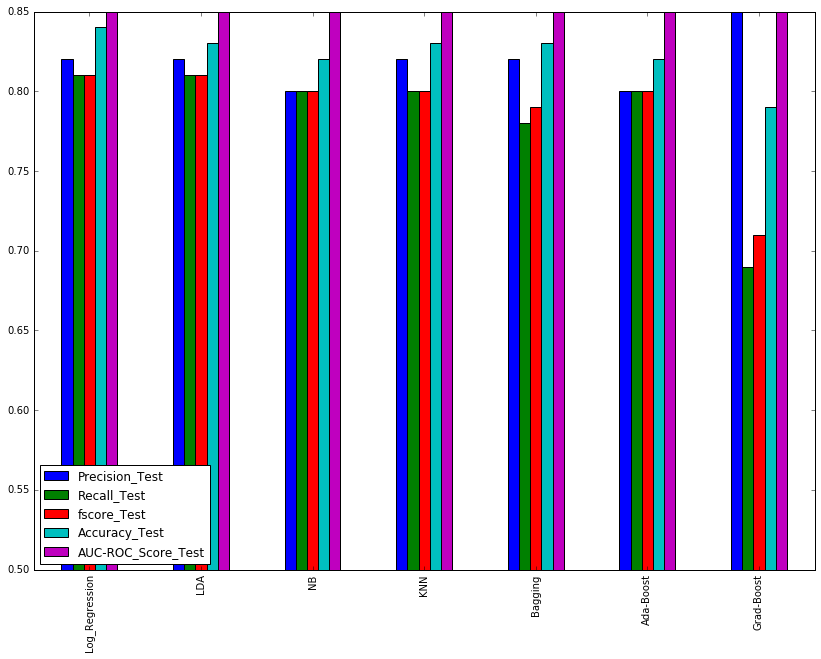

In [190]:
round(Class_Report_Test,2).plot(kind='bar',figsize=(14,10))
plt.ylim([0.5,0.85])
plt.legend( loc='lower left')

***1.8 Based on these predictions, what are the insights? (5 marks)***


In [191]:
# The detailed insights are highlighted in the business report

### Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

##### President Franklin D. Roosevelt in 1941
##### President John F. Kennedy in 1961
##### President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

#### 2.1 Find the number of characters, words, and sentences for the mentioned documents.

#### 2.2 Remove all the stopwords from all three speeches. 

#### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

#### 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) 

***2.1 Find the number of characters, words, and sentences for the mentioned documents.***

In [1]:
pip install nltk

     |████████████████████████████████| 1.5 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 6.3 MB/s  eta 0:00:01
     |████████████████████████████████| 749 kB 48.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the text data 
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guida

In [3]:

nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt = inaugural.raw('1941-Roosevelt.txt')


[nltk_data] Downloading package inaugural to /home/jovyan/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [4]:
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

In [9]:
# Creating Dataframe

df= pd.DataFrame(data=[[Roosevelt,'Roosevelt'],[Kennedy,'Kennedy'],[Nixon,'Nixon']], columns=['Speech','President'])

In [10]:
df

,Speech,President
0,On each national day of inauguration since 178...,Roosevelt
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",Kennedy
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",Nixon


In [11]:
# Number of Characters in all the 3 speeches

df['Char_Count'] = df['Speech'].str.len()
df

,Speech,President,Char_Count
0,On each national day of inauguration since 178...,Roosevelt,7571
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",Kennedy,7618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",Nixon,9991


In [12]:
# Number of Words in all the 3 speeches

df['Word_Count'] = [len(x.split()) for x in df['Speech'].tolist()]

df

,Speech,President,Char_Count,Word_Count
0,On each national day of inauguration since 178...,Roosevelt,7571,1360
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",Kennedy,7618,1390
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",Nixon,9991,1819


In [13]:
# Number of Sentences in all the 3 speeches
nltk.download('punkt')
from nltk.tokenize import sent_tokenize



[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
df['Sentence_Count'] = [len(sent_tokenize(x)) for x in df['Speech'].tolist()]
df

,Speech,President,Char_Count,Word_Count,Sentence_Count
0,On each national day of inauguration since 178...,Roosevelt,7571,1360,68
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",Kennedy,7618,1390,52
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",Nixon,9991,1819,68


***2.2 Remove all the stopwords from all three speeches.***

In [15]:
df_nostopword = df[['Speech','President']].copy()
df_nostopword


,Speech,President
0,On each national day of inauguration since 178...,Roosevelt
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",Kennedy
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",Nixon


In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords
stopwordlist = stopwords.words('english')
df_nostopword['Speech'] = df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwordlist))


In [18]:
# Speech text without Stopwords, also showing the new word count and old word count before removing stopwords
df_nostopword ['wordcount_without_stopword'] = [len(x.split()) for x in df_nostopword['Speech'].tolist()]
df_nostopword

,Speech,President,wordcount_without_stopword
0,"On national day inauguration since 1789, peopl...",Roosevelt,728
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",Kennedy,772
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",Nixon,920


In [19]:
# Word count in previous dataframe without removing stopwords

speech_with_stopword = df['Word_Count']

df_nostopword = df_nostopword.join(speech_with_stopword)

df_nostopword

,Speech,President,wordcount_without_stopword,Word_Count
0,"On national day inauguration since 1789, peopl...",Roosevelt,728,1360
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",Kennedy,772,1390
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",Nixon,920,1819


In [20]:
# Comparing the 1st sentence before and after removing stop words

# 1st sentence before removing stop words

In [21]:
Old_Sentence = sent_tokenize(df['Speech'].tolist()[0])

Old_Sentence[0]

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.'

In [22]:
# 2nd sentence after removing stop words

In [23]:
New_Sentence = sent_tokenize(df_nostopword['Speech'].tolist()[0])

New_Sentence[0]

'On national day inauguration since 1789, people renewed sense dedication United States.'

***2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)***

In [41]:
# Getting the word frequency of the speech after removing the stopwords for 3 speeches

Words_total_Roosevelt =df_nostopword['Speech'][0].split()
Words_total_Kennedy =df_nostopword['Speech'][1].split()
Words_total_Nixon = df_nostopword['Speech'][2].split()

In [44]:
nltk.FreqDist(Words_total_Roosevelt).most_common(20)

[('--', 22),
 ('It', 13),
 ('We', 10),
 ('The', 9),
 ('know', 9),
 ('us', 8),
 ('life', 6),
 ('people', 5),
 ('In', 5),
 ('human', 5),
 ('years', 5),
 ('freedom', 5),
 ('spirit', 5),
 ('speaks', 5),
 ('day', 4),
 ('Nation', 4),
 ('men', 4),
 ('For', 4),
 ('democracy', 4),
 ('body', 4)]

In [45]:
nltk.FreqDist(Words_total_Kennedy).most_common(20)

[('--', 24),
 ('us', 11),
 ('Let', 8),
 ('let', 8),
 ('new', 7),
 ('pledge', 7),
 ('sides', 7),
 ('I', 5),
 ('shall', 5),
 ('To', 5),
 ('But', 5),
 ('ask', 5),
 ('President', 4),
 ('fellow', 4),
 ('freedom', 4),
 ('power', 4),
 ('And', 4),
 ('first', 4),
 ('always', 4),
 ('cannot', 4)]

In [46]:
nltk.FreqDist(Words_total_Nixon).most_common(20)

[('us', 25),
 ('--', 17),
 ('new', 15),
 ('Let', 13),
 ('I', 12),
 ('peace', 11),
 ('great', 9),
 ('America', 9),
 ('let', 9),
 ('We', 9),
 ('world.', 8),
 ("America's", 8),
 ('shall', 7),
 ('policies', 7),
 ('make', 7),
 ('every', 7),
 ('better', 7),
 ('world', 6),
 ('role', 6),
 ('people', 6)]

In [47]:
# Some of the words in the top 20 works seems stop words, excluding them from the speech

stopwordlist.extend(['--','us','We','Let','I','let','The','It','shall','But','In','And'])

In [48]:
df_nostopword['Speech'] = df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwordlist))

In [49]:
Words_total_Roosevelt =df_nostopword['Speech'][0].split()
Words_total_Kennedy =df_nostopword['Speech'][1].split()
Words_total_Nixon = df_nostopword['Speech'][2].split()

In [50]:
nltk.FreqDist(Words_total_Roosevelt).most_common(5)

[('know', 9), ('life', 6), ('people', 5), ('human', 5), ('years', 5)]

In [51]:
nltk.FreqDist(Words_total_Kennedy).most_common(5)

[('new', 7), ('pledge', 7), ('sides', 7), ('To', 5), ('ask', 5)]

In [52]:
nltk.FreqDist(Words_total_Nixon).most_common(5)

[('new', 15), ('peace', 11), ('great', 9), ('America', 9), ('world.', 8)]

***2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)***

In [218]:
df_nostopword['Speech']

0    On national day inauguration since 1789, peopl...
1    Vice President Johnson, Mr. Speaker, Mr. Chief...
2    Mr. Vice President, Mr. Speaker, Mr. Chief Jus...
Name: Speech, dtype: object

In [219]:
pip install wordcloud

     |████████████████████████████████| 366 kB 4.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


Word Cloud for President Roosevelt speech


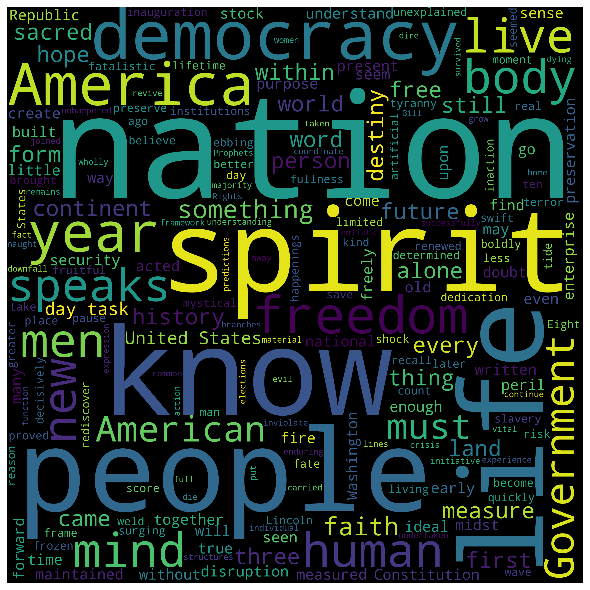

Word Cloud for President Kennedy speech


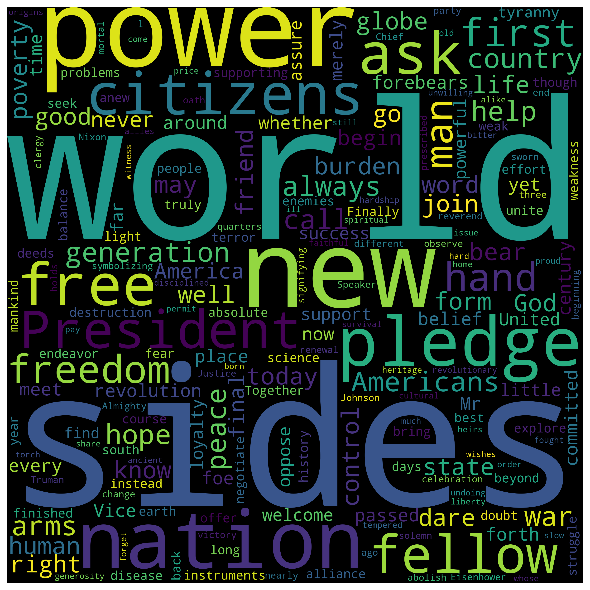

Word Cloud for President Nixon speech


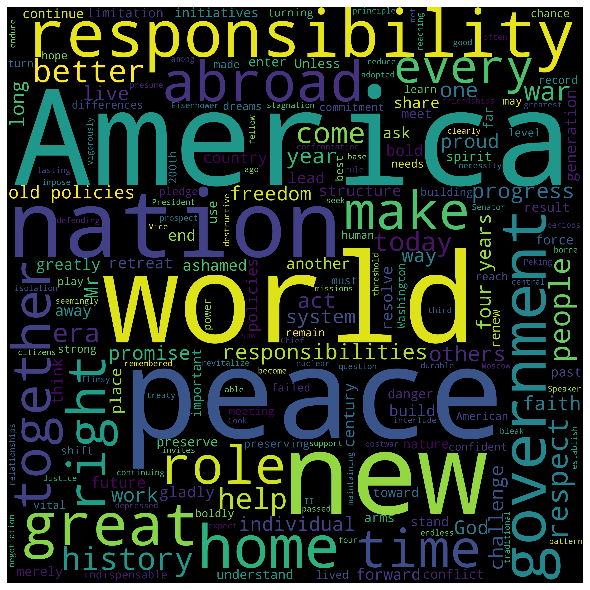

In [232]:
# Word Cloud 
from wordcloud import WordCloud
for i in range(0,df_nostopword.shape[0]):
    wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(df_nostopword['Speech'][i]) 
  
# plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.xlabel('Word Cloud')
    plt.tight_layout(pad = 0) 

    print('Word Cloud for President {} speech'.format(df_nostopword['President'][i]))
    plt.show()